# Market Basket Analytics

In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objects as go
import plotly.offline as pyoff
import matplotlib.pyplot as plt
import plotly.offline as pyoff
import plotly.graph_objs as go
from datetime import datetime, timedelta
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
dataset = pd.read_csv('dados/retail.csv', header = 0, encoding = 'unicode_escape')

In [5]:
dataset.head(10)

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,Brasil
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,Brasil
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,Brasil
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,Brasil
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,Brasil
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,Brasil
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,Brasil
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,Brasil
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,Brasil
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,Brasil


In [6]:
dataset.columns

Index(['NumeroFatura', 'CodigoProduto', 'NomeProduto', 'Quantidade',
       'DataVenda', 'ValorUnitario', 'IdCliente', 'Pais'],
      dtype='object')

In [7]:
dataset.shape

(541800, 8)

In [8]:
dataset.describe()

,Quantidade,ValorUnitario,IdCliente
count,541800.000000,541800.000000,406725.000000
mean,9.551739,4.611581,15287.754038
std,218.103033,96.769576,1713.475925
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13954.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541800 entries, 0 to 541799
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   NumeroFatura   541800 non-null  object 
 1   CodigoProduto  541800 non-null  object 
 2   NomeProduto    540346 non-null  object 
 3   Quantidade     541800 non-null  int64  
 4   DataVenda      541800 non-null  object 
 5   ValorUnitario  541800 non-null  float64
 6   IdCliente      406725 non-null  float64
 7   Pais           541800 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
dataset[['Pais','NumeroFatura']].nunique()

Pais               37
NumeroFatura    25892
dtype: int64

In [22]:
dataset.isnull().sum()


NumeroFatura          0
CodigoProduto         0
NomeProduto        1454
Quantidade            0
DataVenda             0
ValorUnitario         0
IdCliente        135075
Pais                  0
dtype: int64

In [23]:
print(dataset.isnull().sum() / len(dataset) * 100)

NumeroFatura      0.000000
CodigoProduto     0.000000
NomeProduto       0.268365
Quantidade        0.000000
DataVenda         0.000000
ValorUnitario     0.000000
IdCliente        24.930786
Pais              0.000000
dtype: float64


In [12]:
dataset[['Pais','NumeroFatura']].groupby(['Pais']).nunique()



,NumeroFatura
Pais,
Alemanha,603
Australia,69
Austria,19
Bahrain,4
Belgium,119
Brasil,23486
Canada,6
Channel Islands,33
Chile,5


<AxesSubplot:xlabel='Pais'>

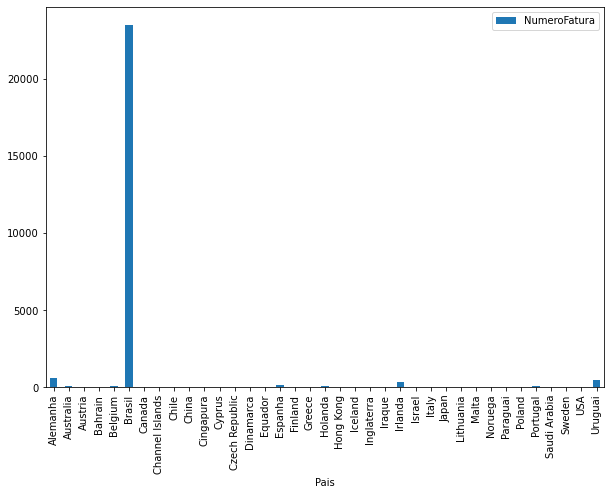

In [13]:
(dataset[['Pais','NumeroFatura']].groupby('Pais').nunique()).plot(kind='bar',figsize=(10,7))

In [14]:
dataset['Quantidade'].nlargest(10)


540421    80995
61619     74215
502122    12540
74614      5568
421632     4800
206121     4300
220843     4000
97432      3906
270885     3186
52711      3114
Name: Quantidade, dtype: int64

In [15]:
dataset['ValorUnitario'].nlargest(10)

222681    38970.00
524602    17836.46
43702     16888.02
43703     16453.71
15016     13541.33
15017     13541.33
16356     13541.33
16232     13474.79
524601    11586.50
299982    11062.06
Name: ValorUnitario, dtype: float64

In [16]:
dataset.sort_values(by=['Quantidade', 'ValorUnitario'], ascending=[True, False])

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,Brasil
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,Brasil
225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,Brasil
225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,Brasil
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,Brasil
...,...,...,...,...,...,...,...,...
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,10/27/2011 12:26,0.21,12901.0,Brasil
74614,542504,37413,NaN,5568,1/28/2011 12:03,0.00,NaN,Brasil
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,Brasil
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,Brasil


In [19]:
dataset.isnull().sum()

NumeroFatura          0
CodigoProduto         0
NomeProduto        1454
Quantidade            0
DataVenda             0
ValorUnitario         0
IdCliente        135075
Pais                  0
dtype: int64

In [24]:
dataset['Faturamento'] = dataset['Quantidade'] * dataset['ValorUnitario']

In [25]:
dataset.describe()

,Quantidade,ValorUnitario,IdCliente,Faturamento
count,541800.000000,541800.000000,406725.000000,541800.000000
mean,9.551739,4.611581,15287.754038,17.986942
std,218.103033,96.769576,1713.475925,378.848746
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13954.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


# Limpeza 

In [28]:
dataset.loc[(dataset['Faturamento'] <= 0)]

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527.0,Brasil,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311.0,Brasil,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548.0,Brasil,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,Brasil,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,Brasil,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-09-12 09:57:00,0.83,14397.0,Brasil,-9.13
541536,C581499,M,Manual,-1,2011-09-12 10:28:00,224.69,15498.0,Brasil,-224.69
541710,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12 11:57:00,10.95,15311.0,Brasil,-54.75
541711,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12 11:58:00,1.25,17315.0,Brasil,-1.25


In [29]:
cleaner_total = dataset.loc[(dataset['Faturamento'] <= 0)]

In [30]:
cleaner_total

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527.0,Brasil,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311.0,Brasil,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548.0,Brasil,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,Brasil,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,Brasil,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-09-12 09:57:00,0.83,14397.0,Brasil,-9.13
541536,C581499,M,Manual,-1,2011-09-12 10:28:00,224.69,15498.0,Brasil,-224.69
541710,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12 11:57:00,10.95,15311.0,Brasil,-54.75
541711,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12 11:58:00,1.25,17315.0,Brasil,-1.25


In [31]:
ds1 = dataset.drop(cleaner_total.index)

In [34]:
ds1.loc[(ds1['Faturamento'] <= 0)]

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento


In [35]:
ds1.describe()

,Quantidade,ValorUnitario,IdCliente,Faturamento
count,529995.000000,529995.000000,397780.000000,529995.000000
mean,10.541718,3.907958,15294.490108,20.121438
std,155.540031,35.919357,1713.013972,270.384290
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [36]:
ds1 = ds1.drop(columns='CodigoProduto')

In [38]:
ds1.head(10)

,NumeroFatura,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Faturamento
0,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12 08:26:00,4.25,17850.0,Brasil,25.50
1,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,Brasil,15.30
2,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,Brasil,20.34
3,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,Brasil,22.00
4,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,Brasil,20.34
5,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,Brasil,20.34
6,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12 08:26:00,7.65,17850.0,Brasil,15.30
7,536366,HAND WARMER UNION JACK,6,2010-01-12 08:28:00,1.85,17850.0,Brasil,11.10
8,536366,HAND WARMER RED POLKA DOT,6,2010-01-12 08:28:00,1.85,17850.0,Brasil,11.10
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12 08:34:00,1.69,13047.0,Brasil,54.08


# Tratamento de Outliers (Faturamento)

In [39]:
ds1.sort_values(['Quantidade'], ascending = False)

ds1['Quantidade'].mean()

print((ds1.loc[ds1['Quantidade'] > 1000]))

cleaner_quantidade = (ds1.loc[ds1['Quantidade'] > 1000])

cleaner_quantidade

ds1 = ds1.drop(cleaner_quantidade.index)

ds1.describe()


       NumeroFatura                        NomeProduto  Quantidade  \
4850         536809     ASSORTED COLOUR T-LIGHT HOLDER        1824   
4945         536830  WORLD WAR 2 GLIDERS ASSTD DESIGNS        2880   
4946         536830             RED  HARMONICA IN BOX         1400   
6365         536890              ASSORTED INCENSE PACK        1440   
16435        537659            CREAM HEART CARD HOLDER        1008   
...             ...                                ...         ...   
533812       581115    METAL SIGN TAKE IT OR LEAVE IT         1404   
534952       581175                 RABBIT NIGHT LIGHT        1440   
540070       581458                     POPCORN HOLDER        1500   
540071       581459                     POPCORN HOLDER        1200   
540421       581483        PAPER CRAFT , LITTLE BIRDIE       80995   

                 DataVenda  ValorUnitario  IdCliente     Pais  Faturamento  
4850   2010-02-12 16:48:00           0.55    15299.0   Brasil      1003.20  
4945 

,Quantidade,ValorUnitario,IdCliente,Faturamento
count,529888.000000,529888.000000,397675.000000,529888.000000
mean,9.922955,3.908555,15294.421570,19.357868
std,28.220334,35.922956,1712.998844,86.095979
min,1.000000,0.001000,12347.000000,0.001000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,1000.000000,13541.330000,18287.000000,38970.000000


In [40]:

ds1.describe()

,Quantidade,ValorUnitario,IdCliente,Faturamento
count,529888.000000,529888.000000,397675.000000,529888.000000
mean,9.922955,3.908555,15294.421570,19.357868
std,28.220334,35.922956,1712.998844,86.095979
min,1.000000,0.001000,12347.000000,0.001000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,1000.000000,13541.330000,18287.000000,38970.000000


In [ ]:
# Tranformação das colunas categóricas para string

In [42]:

dataset['NumeroFatura'] = dataset['NumeroFatura'].astype('str')

dataset['IdCliente'] = dataset['IdCliente'].astype('str')

dataset.dtypes

NumeroFatura             object
CodigoProduto            object
NomeProduto              object
Quantidade                int64
DataVenda        datetime64[ns]
ValorUnitario           float64
IdCliente                object
Pais                     object
Faturamento             float64
dtype: object

# Apriori

## Criação e transformação do Dataframe Pivot para Apriori

In [44]:
ds1_pivot = ds1.pivot_table(index = ['NumeroFatura'], columns = ['NomeProduto'], values = 'Quantidade')

ds1_pivot = ds1_pivot.fillna(0)



KeyError: "None of ['NumeroFatura'] are in the columns"

In [45]:
ds1_pivot = ds1_pivot.fillna(0)

In [46]:
ds1_pivot

NomeProduto,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
NumeroFatura,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Convertendo valores maiores que 1 para 1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [50]:
cesta1 = ds1_pivot.applymap(encode_units)

In [52]:
cesta1.head(5)

NomeProduto,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
NumeroFatura,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Aplicação do Algoritimo Apriori e Association Rules 

In [53]:
# Apirori
itemset1 = apriori(cesta1, min_support=0.02, use_colnames=True)

itemset1

,support,itemsets
0,0.023495,(3 STRIPEY MICE FELTCRAFT)
1,0.024248,(4 TRADITIONAL SPINNING TOPS)
2,0.047944,(6 RIBBONS RUSTIC CHARM)
3,0.021939,(60 CAKE CASES DOLLY GIRL DESIGN)
4,0.031026,(60 CAKE CASES VINTAGE CHRISTMAS)
...,...,...
374,0.020483,"(WHITE HANGING HEART T-LIGHT HOLDER, WOODEN PI..."
375,0.027060,"(WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F..."
376,0.027160,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN..."
377,0.020483,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU..."


In [54]:
# Criação das regras de associação
regras = association_rules(itemset1, metric="confidence", min_threshold=0.5)


regras

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.041568,0.066118,0.022642,0.544686,8.238117,0.019893,2.051073
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.039309,0.049149,0.020985,0.533844,10.861739,0.019053,2.039771
2,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.052713,0.049149,0.032080,0.608571,12.382160,0.029489,2.429181
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.049149,0.052713,0.032080,0.652707,12.382160,0.029489,2.727628
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED ),0.039309,0.052713,0.023596,0.600255,11.387131,0.021523,2.369730
...,...,...,...,...,...,...,...,...,...
56,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...",(ROSES REGENCY TEACUP AND SAUCER ),0.025553,0.053467,0.020483,0.801572,14.992025,0.019117,4.770154
57,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(REGENCY CAKESTAND 3 TIER),0.038506,0.099804,0.020483,0.531943,5.329862,0.016640,1.923260
58,"(JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI)",(JUMBO BAG RED RETROSPOT),0.025805,0.104774,0.020684,0.801556,7.650313,0.017980,4.511235
59,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",(JUMBO STORAGE BAG SUKI),0.041317,0.059391,0.020684,0.500608,8.429080,0.018230,1.883508
